# Diferenças finitas


\begin{equation*}
y''=p( x) y'( x) +q( x) y( x) +r( x) ,\quad y_{0} =\alpha ,\quad y_{N+1} =\beta ,\quad a\leq x\leq b
\end{equation*}

## Aproximando a primeira derivada

### Aproximando para frente

\begin{equation}
y( x_{i+1}) =y( x_{i}) +h\ y'( x_{i}) +\frac{h^{2}}{2} y''( x_{i}) +\frac{h^{3}}{6} y^{( 3)}( x_{i}) +\frac{h^{4}}{24} y^{( 4)}( x_{i}) +\cdots 
\end{equation}

truncando os termos de $\displaystyle h^{2}$:

\begin{equation*}
y'( x_{i}) =\frac{y( x_{i+1}) -y( x_{i}) +\mathcal{O}\left( h^{2}\right)}{h} \Longrightarrow \boxed{y'( x_{i}) =\frac{y_{i+1} -y_{i}}{h} +\mathcal{O}( h)}
\end{equation*}

### Aproximando para trás

\begin{equation}
y( x_{i-1}) =y( x_{i}) -h\ y'( x_{i}) +\frac{h^{2}}{2} y''( x_{i}) -\frac{h^{3}}{6} y^{( 3)}( x_{i}) +\frac{h^{4}}{24} y^{( 4)}( x_{i}) +\cdots 
\end{equation}

truncando os termos de $\displaystyle h^{2}$:

\begin{equation*}
y'( x_{i}) =\frac{y( x_{i}) -y( x_{i+1}) +\mathcal{O}\left( h^{2}\right)}{h} \Longrightarrow \boxed{y'( x_{i}) =\frac{y_{i} -y_{i-1}}{h} +\mathcal{O}( h)}
\end{equation*}

### Diferença central

Subtraindo as (1) e (2):

\begin{equation*}
y( x_{i+1}) -y( x_{i-1}) =2hy'( x_{i}) +\mathcal{O}\left( h^{3}\right) \Longrightarrow y'( x_{i}) =\frac{y( x_{i+1}) -y( x_{i-1}) +\mathcal{O}\left( h^{3}\right)}{2h}
\end{equation*}

\begin{equation*}
\boxed{y'( x_{i}) =\frac{y_{i+1} -y_{i-1}}{2h} +\mathcal{O}\left( h^{2}\right)}
\end{equation*}

## Aproximando segunda derivada

Somando as (1) e (2):

\begin{equation*}
y( x_{i+1}) +y( x_{i-1}) =2y( x_{i}) +\mathcal{h^{2} y''( x_{i}) +O}\left( h^{4}\right) \Longrightarrow \mathcal{y''( x_{i})} =\frac{y( x_{i+1}) +y( x_{i-1}) -2y( x_{i}) +\mathcal{O}\left( h^{4}\right)}{h^{2}}
\end{equation*}

\begin{equation*}
\boxed{\mathcal{y''( x_{i})} =\frac{y_{i+1} -2y_{i} +y_{i-1}}{h^{2}} +\mathcal{O}\left( h^{2}\right)}
\end{equation*}

## Discretizando um sistema linear de segunda ordem

\begin{align*}
\frac{y_{i+1} -2y_{i} +y_{i-1}}{h^{2}} =p( x_{i})\left(\frac{y_{i+1} -y_{i-1}}{2h}\right) +q( x_{i}) y_{i} +r( x_{i}) &
\Longrightarrow y_{i+1} -2y_{i} +y_{i-1} =\frac{h}{2} p( x_{i})( y_{i+1} -y_{i-1}) +h^{2} q( x_{i}) y_{i} +h^{2} r( x_{i})\\
& \Longrightarrow y_{i-1}\left( 1+\frac{h}{2} p( x_{i})\right) -y_{i}\left( 2+h^{2} q( x_{i})\right) +y_{i+1}\left( 1-\frac{h}{2} p( x_{i})\right) =h^{2} r( x_{i})
\end{align*}

\begin{equation*}
\boxed{A_{i} y_{i-1} +B_{i} y_{i} +C_{i} y_{i+1} =D_{i}}
\end{equation*}

\begin{equation*}
A_{i} =1+\frac{h}{2} p( x_{i}) ,\quad B_{i} =-2-h^{2} q( x_{i}) ,\quad C_{i} =1-\frac{h}{2} p( x_{i}) ,\quad D_{i} =h^{2} r( x_{i})
\end{equation*}

\begin{equation*}
\left\{\begin{array}{ l }
B_{1} y_{1} +C_{1} y_{2} =D_{1} - A_{1} \alpha\\
A_{2} y_{1} +B_{2} y_{2} +C_{2} y_{3} =D_{2}\\
\vdots \\
A_{N-1} y_{N-2} +B_{N-1} y_{N-1} +C_{N-1} y_{N} =D_{N-1}\\
A_{N} y_{N-2} +B_{N} y_{N} =D_{N}-C_{N} \beta
\end{array}\right. 
\end{equation*}

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display

In [21]:
from typing import Callable

class LinearFDM:
    def __init__(self, p : Callable, q : Callable, r : Callable, 
                    x0: float, y0: float, xf: float, yf: float, h : float) -> None:

        self.x0, self.xf = x0, xf
        self.y0, self.yf = y0, yf
        N = int((xf - x0)/h)
        self.x = x0 + h*np.arange(N)

        A, B, C, self.D = 1 + h*p(self.x)/2, -2-h**2*q(self.x), 1-h*p(self.x)/2, h**2*r(self.x)
        self.D[1] -= A[1]*y0
        self.D[-1] -= C[-1]*yf

        self.M = np.zeros((N-1, N-1))
        self.M[0, :2] = B[0], C[0]
        for i in range(1, N-2):
            self.M[i, i-1:i+2] = A[i], B[i], C[i]
        self.M[-1, -2:] = A[-1], B[-1]
    
    def inv(self) -> tuple:
        y = np.linalg.inv(self.M).dot(self.D[1:])
        return np.r_[self.x, self.xf], np.r_[self.y0, y, self.yf]

def table(x, y) -> None:
    display(HTML(pd.DataFrame({'x':x, 'y':y}).to_html()))

46 µs ± 9.28 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


,x,y
0,1.0,1.000000
1,1.1,1.093876
2,1.2,1.183023
3,1.3,1.276391
4,1.4,1.373175
5,1.5,1.472787
6,1.6,1.574780
7,1.7,1.678805
8,1.8,1.784585
9,1.9,1.891891


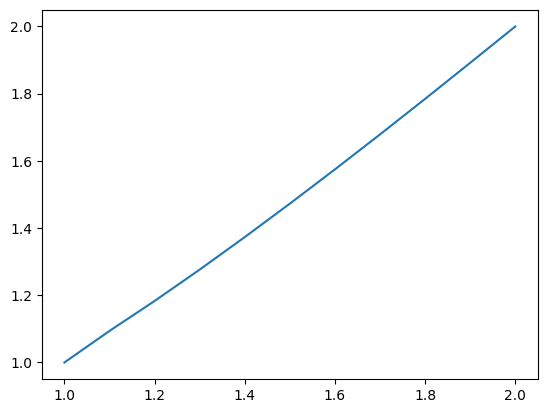

In [22]:
solver = LinearFDM(
    p= lambda x: -2/x, 
    q= lambda x: 2/x**2, 
    r= lambda x: np.sin(np.log(x))/x**2, 
    x0=1, y0=1, xf=2, yf=2, h=0.1
)
%timeit x, y = solver.inv()
table(x, y)
plt.plot(x, y)
plt.show()